In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [22]:
df=pd.read_csv('Mall_Customers.csv')

In [23]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [24]:
df.columns=['ID','gender','age','income','score']

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
ID        200 non-null int64
gender    200 non-null object
age       200 non-null int64
income    200 non-null int64
score     200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [26]:
df.describe()

,ID,age,income,score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


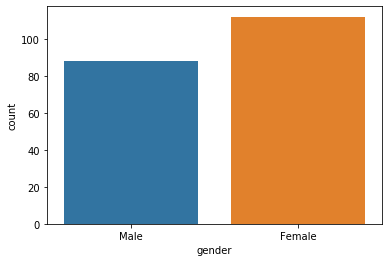

In [29]:
sns.countplot('gender',data=df)

In [30]:
df['gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: gender, dtype: float64

(array([31., 19., 34., 29., 16., 26., 15., 10.,  6., 14.]),
 array([18. , 23.2, 28.4, 33.6, 38.8, 44. , 49.2, 54.4, 59.6, 64.8, 70. ]),
 <a list of 10 Patch objects>)

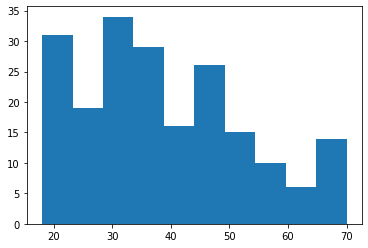

In [31]:
plt.hist(df['age'])

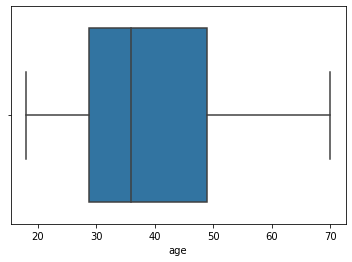

In [32]:
sns.boxplot('age',data=df)

(array([24., 22., 28., 38., 30., 36.,  8.,  6.,  4.,  4.]),
 array([ 15. ,  27.2,  39.4,  51.6,  63.8,  76. ,  88.2, 100.4, 112.6,
        124.8, 137. ]),
 <a list of 10 Patch objects>)

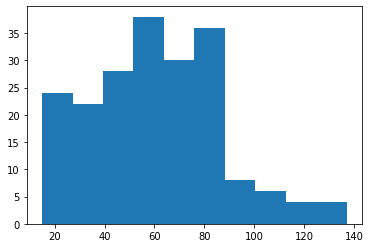

In [33]:
plt.hist(df['income'])

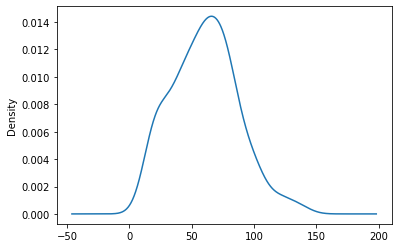

In [34]:
df['income'].plot(kind='kde')

In [41]:
df['gender']=df['gender'].map({'Male':0,'Female':1})

In [43]:
X=df.drop('ID',axis=1)

In [44]:
from sklearn.cluster import KMeans

In [45]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

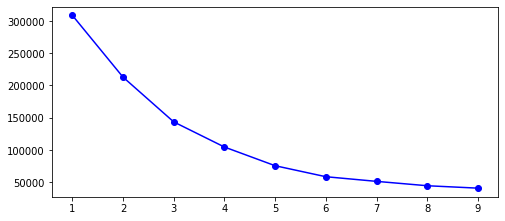

In [46]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")

In [47]:
from sklearn.metrics import silhouette_score

In [48]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

Text(0, 0.5, 'Silhouette score')

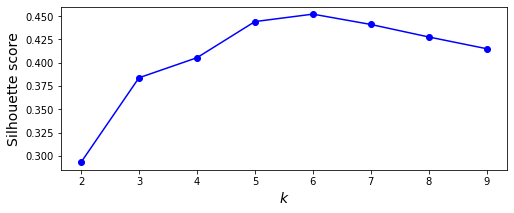

In [51]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)

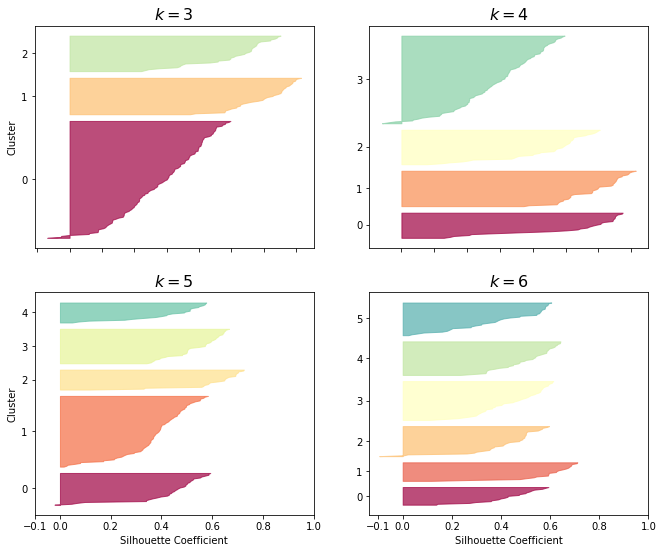

In [65]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)
    plt.title("$k={}$".format(k), fontsize=16)


In [101]:
kmeans=KMeans(6)

In [102]:
X['cluster']=kmeans.fit_predict(X)

In [103]:
X['cluster'].value_counts()

1    45
3    39
2    38
4    35
0    22
5    21
Name: cluster, dtype: int64

In [104]:
kmeans.inertia_

58376.347963147964

In [105]:
X.groupby('cluster')['age','score','income'].mean()

,age,score,income
cluster,,,
0,25.272727,79.363636,25.727273
1,56.155556,49.088889,53.377778
2,27.000000,49.131579,56.657895
3,32.692308,82.128205,86.538462
4,41.685714,17.285714,88.228571
5,44.142857,19.523810,25.142857


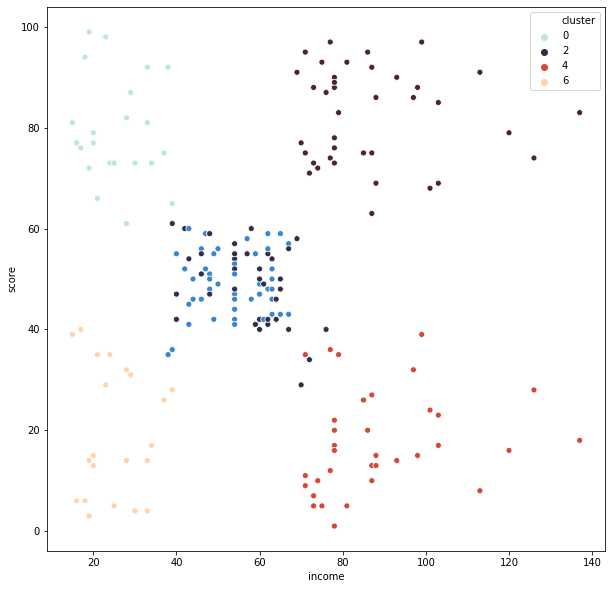

In [115]:
plt.figure(figsize=(10,10))
sns.scatterplot('income','score',hue='cluster',data=X,palette='icefire')